In [ ]:
import cv2
import itertools
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize the mediapipe face detection class.
mp_face_detection = mp.solutions.face_detection

# Setup the face detection function.
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

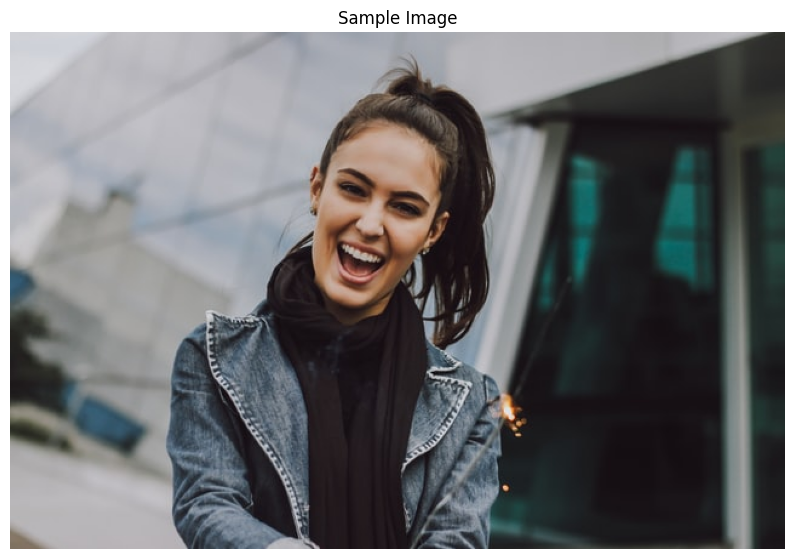

In [ ]:
# Read an image from the specified path.
sample_img = cv2.imread('/content/drive/MyDrive/media/sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [ ]:
# Perform face detection after converting the image into RGB format.
face_detection_results = face_detection.process(sample_img[:,:,::-1])

# Check if the face(s) in the image are found.
if face_detection_results.detections:

    # Iterate over the found faces.
    for face_no, face in enumerate(face_detection_results.detections):

        # Display the face number upon which we are iterating upon.
        print(f'FACE NUMBER: {face_no+1}')
        print('---------------------------------')

        # Display the face confidence.
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        # Get the face bounding box and face key points coordinates.
        face_data = face.location_data

        # Display the face bounding box coordinates.
        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')

        # Iterate two times as we only want to display first two key points of each detected face.
        for i in range(2):

            # Display the found normalized key points.
            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

FACE NUMBER: 1
---------------------------------
FACE CONFIDENCE: 0.98

FACE BOUNDING BOX:
xmin: 0.39702364802360535
ymin: 0.2762746810913086
width: 0.16100731492042542
height: 0.24132275581359863

RIGHT_EYE:
x: 0.4368540048599243
y: 0.3198586106300354

LEFT_EYE:
x: 0.5112437605857849
y: 0.3565130829811096



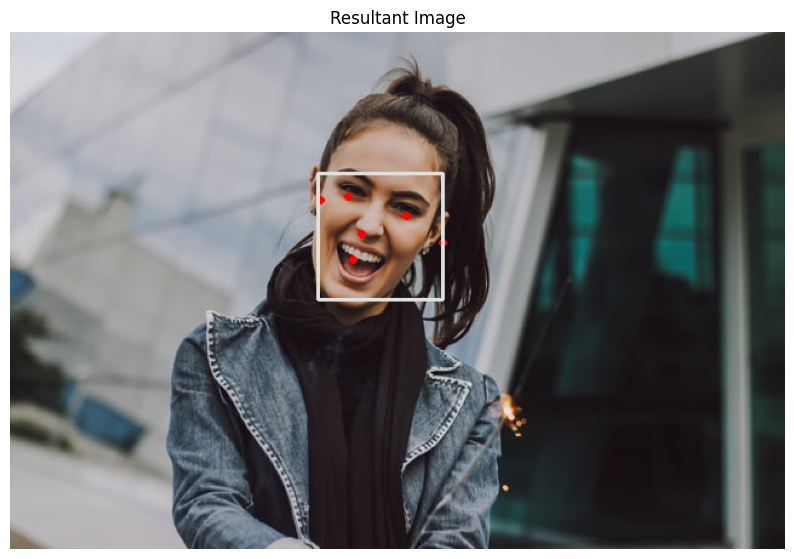

In [ ]:
# Create a copy of the sample image to draw the bounding box and key points.
img_copy = sample_img[:,:,::-1].copy()

# Check if the face(s) in the image are found.
if face_detection_results.detections:

    # Iterate over the found faces.
    for face_no, face in enumerate(face_detection_results.detections):

        # Draw the face bounding box and key points on the copy of the sample image.
        mp_drawing.draw_detection(image=img_copy, detection=face,
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
# Specify a size of the figure.
fig = plt.figure(figsize = [10, 10])

# Display the resultant image with the bounding box and key points drawn,
# also convert BGR to RGB for display.
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [ ]:
# Initialize the mediapipe face mesh class.
mp_face_mesh = mp.solutions.face_mesh

# Setup the face landmarks function for images.
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

# Setup the face landmarks function for videos.
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1,
                                         min_detection_confidence=0.5,min_tracking_confidence=0.3)

# Initialize the mediapipe drawing styles class.
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
# Perform face landmarks detection after converting the image into RGB format.
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

# Get the list of indexes of the left and right eye.
LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:

    # Iterate over the found faces.
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        # Display the face number upon which we are iterating upon.
        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        # Display the face part name i.e., left eye whose landmarks we are gonna display.
        print(f'LEFT EYE LANDMARKS:\n')

        # Iterate over the first two landmarks indexes of the left eye.
        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            # Display the found normalized landmarks of the left eye.
            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        # Display the face part name i.e., right eye whose landmarks we are gonna display.
        print(f'RIGHT EYE LANDMARKS:\n')

        # Iterate over the first two landmarks indexes of the right eye.
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            # Display the found normalized landmarks of the right eye.
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.49976223707199097
y: 0.33403876423835754
z: -0.003551195142790675

x: 0.505622386932373
y: 0.3346547782421112
z: -0.005253524519503117

RIGHT EYE LANDMARKS:

x: 0.4383928179740906
y: 0.29986220598220825
z: -0.001492970623075962

x: 0.43043234944343567
y: 0.3003302812576294
z: 0.006076945923268795



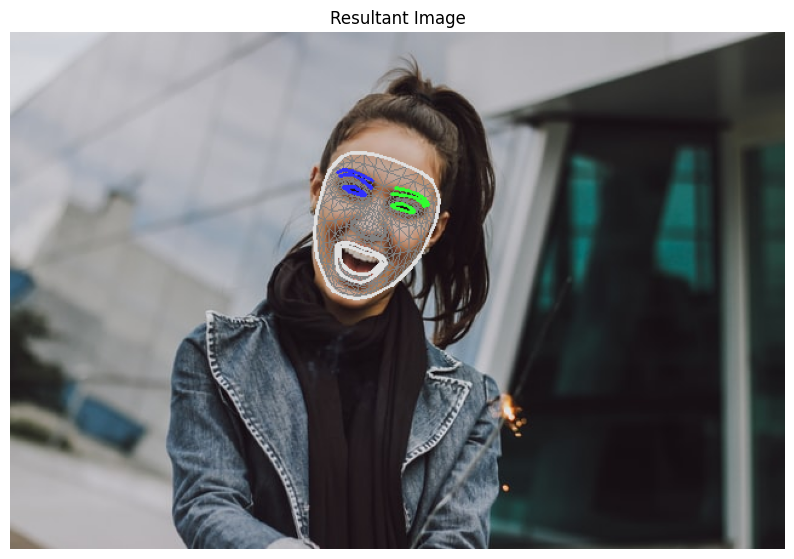

In [ ]:
# Create a copy of the sample image in RGB format to draw the found facial landmarks on.
img_copy = sample_img[:,:,::-1].copy()

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:

    # Iterate over the found faces.
    for face_landmarks in face_mesh_results.multi_face_landmarks:

        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh tesselation connections using default face mesh tesselation style.
        mp_drawing.draw_landmarks(image=img_copy,
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh contours connections using default face mesh contours style.
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

# Specify a size of the figure.
fig = plt.figure(figsize = [10, 10])

# Display the resultant image with the face mesh drawn.
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [ ]:
def detectFacialLandmarks(image, face_mesh, display = True):
    '''
    This function performs facial landmarks detection on an image.
    Args:
        image:     The input image of person(s) whose facial landmarks needs to be detected.
        face_mesh: The face landmarks detection function required to perform the landmarks detection.
        display:   A boolean value that is if set to true the function displays the original input image,
                   and the output image with the face landmarks drawn and returns nothing.
    Returns:
        output_image: A copy of input image with face landmarks drawn.
        results:      The output of the facial landmarks detection on the input image.
    '''

    # Perform the facial landmarks detection on the image, after converting it into RGB format.
    results = face_mesh.process(image[:,:,::-1])

    # Create a copy of the input image to draw facial landmarks.
    output_image = image[:,:,::-1].copy()

    # Check if facial landmarks in the image are found.
    if results.multi_face_landmarks:

        # Iterate over the found faces.
        for face_landmarks in results.multi_face_landmarks:

            # Draw the facial landmarks on the output image with the face mesh tesselation
            # connections using default face mesh tesselation style.
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            # Draw the facial landmarks on the output image with the face mesh contours
            # connections using default face mesh contours style.
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

    # Check if the original input image and the output image are specified to be displayed.
    if display:

        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');

    # Otherwise
    else:

        # Return the output image in BGR format and results of facial landmarks detection.
        return np.ascontiguousarray(output_image[:,:,::-1], dtype=np.uint8), results

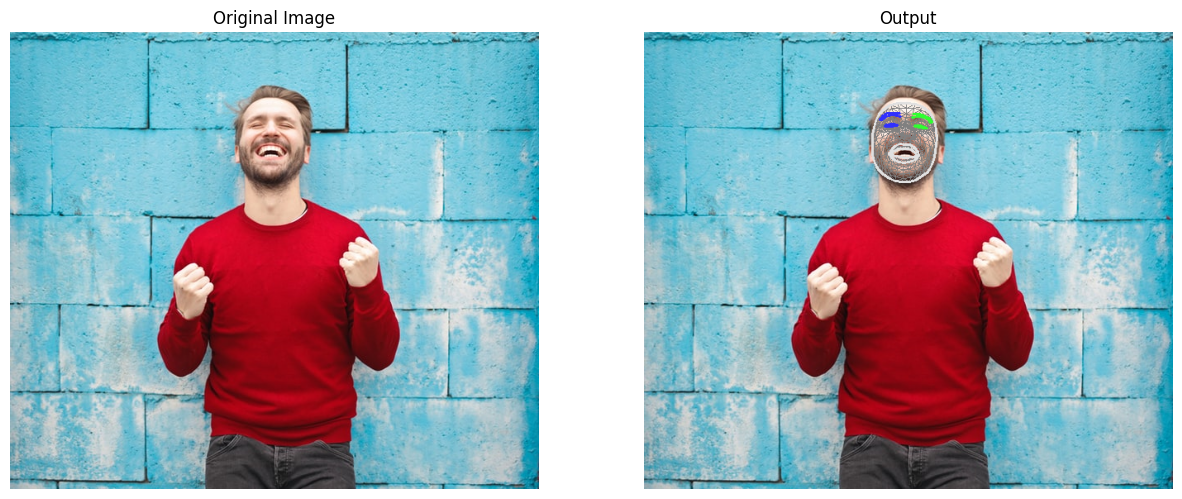

In [ ]:
# Read a sample image and perform facial landmarks detection on it.
image = cv2.imread('/content/drive/MyDrive/media/sample1.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

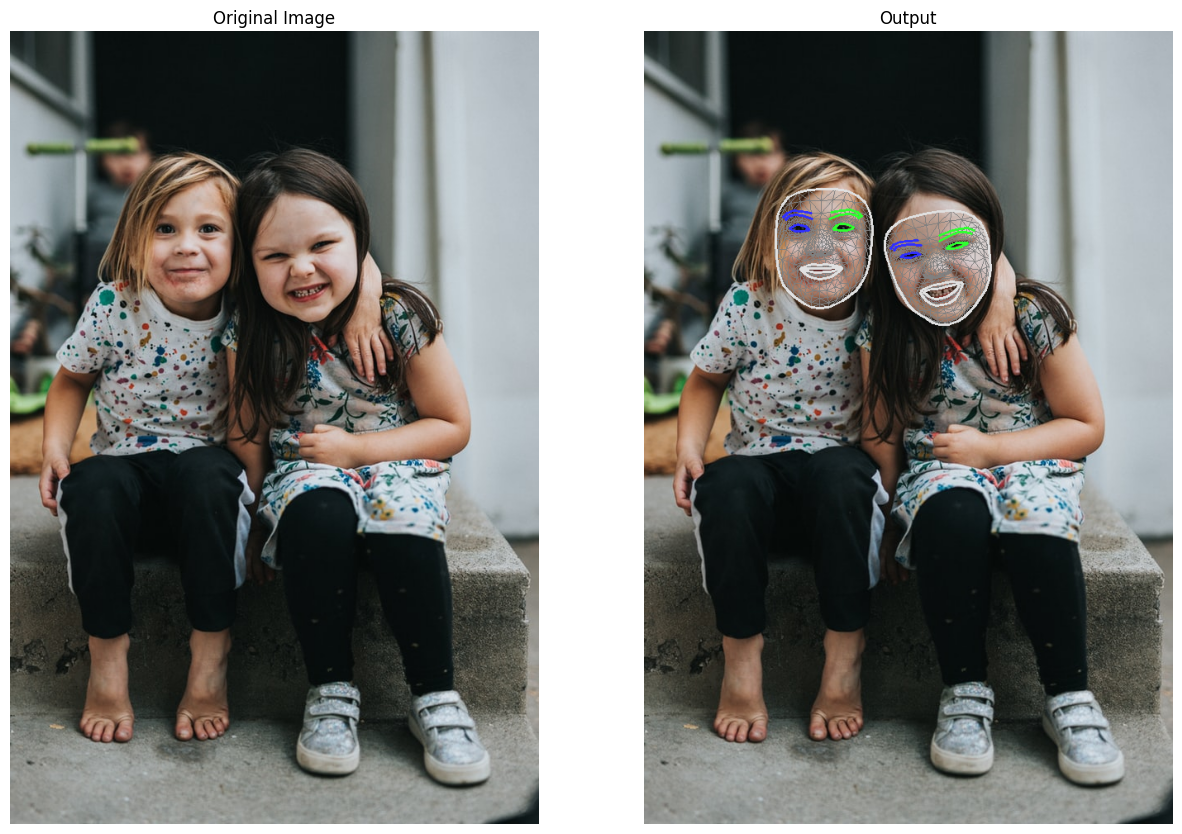

In [ ]:
# Read another sample image and perform facial landmarks detection on it.
image = cv2.imread('/content/drive/MyDrive/media/sample2.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

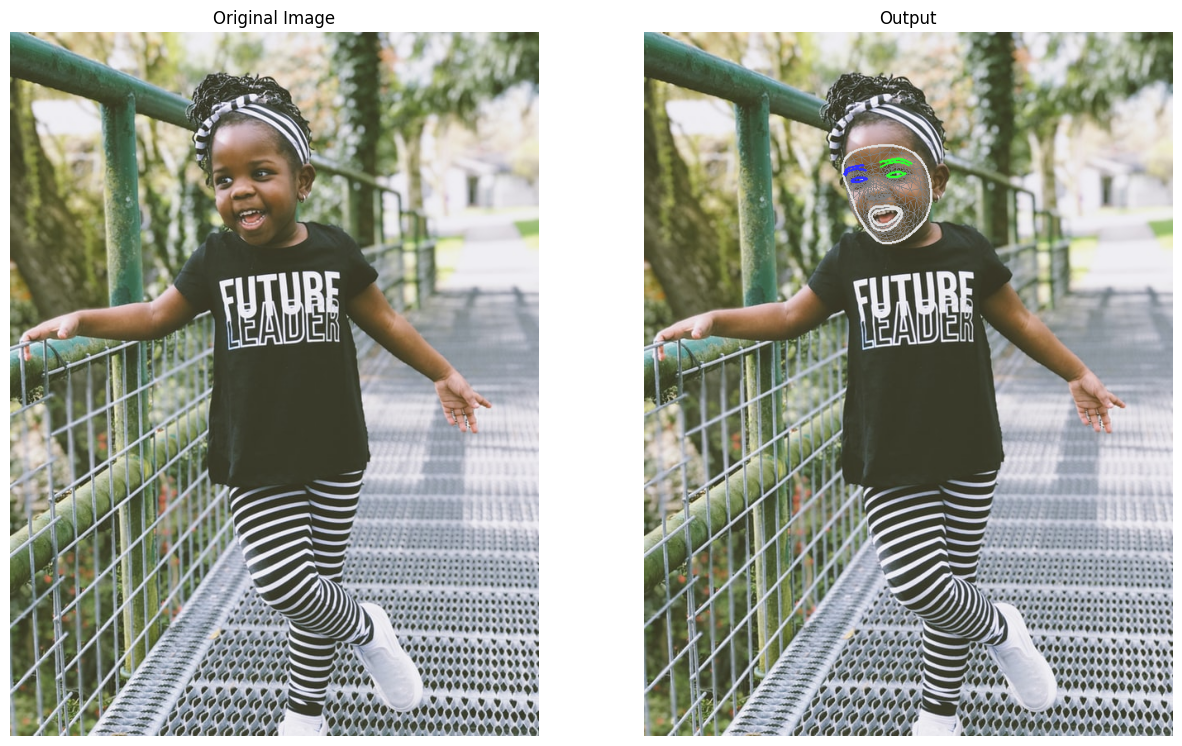

In [ ]:
# Read another sample image and perform facial landmarks detection on it.
image = cv2.imread('/content/drive/MyDrive/media/sample3.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

In [ ]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():

    # Read a frame.
    ok, frame = camera_video.read()

    # Check if frame is not read properly then continue to the next iteration to
    # read the next frame.
    if not ok:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Perform Face landmarks detection.
    frame, _ = detectFacialLandmarks(frame, face_mesh_videos, display=False)

    # Set the time for this frame to the current time.
    time2 = time()

    # Check if the difference between the previous and this frame time > 0 to avoid
    # division by zero.
    if (time2 - time1) > 0:

        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)

        # Write the calculated number of frames per second on the frame.
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2

    # Display the frame.
    cv2.imshow('Face Landmarks Detection', frame)

    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()